In [1]:
import os
myfile='/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/siconc_SImon_GFDL-CM4_piControl_r1i1p1f1_gr_015101-025012.nc'
os.path.isfile(myfile)

True

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from iris import *
import iris.analysis.cartography
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np

In [36]:
fname = '/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/siconc_SImon_GFDL-CM4_piControl_r1i1p1f1_gr_015101-025012.nc'
siconc = iris.load_cube(fname)
print(siconc)

sea_ice_area_fraction / (%)         (time: 1200; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                             x               -               -
        latitude                         -               x               -
        longitude                        -               -               x
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 CMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       54750.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-02-03T16:22:06Z
        data_specs_version          01.00.27
        experiment                

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'siconc'
  warnings.warn(


In [4]:
# three coords time, lat, lon
lat_long_data_from_1st_time_step = siconc[0,:,:]
lat_long_data_from_2nd_time_step = siconc[2,:,:]
time_long_data_from_1st_latitude_step = siconc[:,0,:]
time_lat_data_from_1st_litudeong_step = siconc[:,:,0]
siconc_at_time_zero = siconc[0,:,:]
print(siconc_at_time_zero)

sea_ice_area_fraction / (%)         (latitude: 180; longitude: 360)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        time                        0151-01-16 12:00:00, bound=(0151-01-01 00:00:00, 0151-02-01 00:00:00)
    Cell methods:
        mean where sea              area
        mean                        time
    Attributes:
        Conventions                 CF-1.7 CMIP-6.0 UGRID-1.0
        activity_id                 CMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       54750.0
        comment                     Model data on the 1x1 grid includes values in all cells for which any ocean...
        contact                     gfdl.climate.model.info@noaa.gov
        creation_date               2019-02-03T16:22:06Z
        data_specs_version          01.00.27
        experim

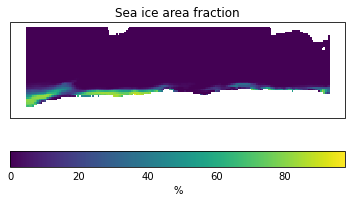

In [39]:
west = -30
east = 150
south = -80
north = -30
temporary_cube=siconc_at_time_zero.intersection(longitude = (west, east))
my_regional_cube=temporary_cube.intersection(latitude = (south,north))
qplt.pcolormesh(my_regional_cube)

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xtop_labels = True
gl.yleft_labels = True
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -160,-140,-120, -100, -80,-60,-45,-20, 0,20, 45,60,80,100,120,140,150,160, 180])
gl.xlabel_style = {'size': 5, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


In [40]:
import iris
from iris.coord_categorisation import *
#extracting just two months from a cube with all of teh months - here 12 and 1: December and January


add_month_number(siconc, 'time', name='month_number')
cube2 = siconc[np.where((siconc.coord('month_number').points == 12) |(siconc.coord('month_number')==1))]
#then to average this by each year, so that you have the December-Jan for each year add the 'season year', i.e. a number of each 'season'
add_season_year(cube2, 'time', name='season_year')
#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube 2 then contains the averaged for each december-january period in each year


<iris 'Cube' of sea_ice_area_fraction / (%) (time: 100; latitude: 180; longitude: 360)>

In [45]:
qplt.plt(cube2)


TypeError: 'module' object is not callable

In [33]:
polynya_threshold = extract from cube2 30.0
if siconc > 0:
    print('this statement is true')
    
if siconc is less that 30 : (=to or <)
    Body of if
elif and surrounded by siconc of 80 :
    print of elif
else: 
    dont print of else

TypeError: '>' not supported between instances of 'Cube' and 'int'

In [34]:
print(sea_ice_area_fraction)

NameError: name 'sea_ice_area_fraction' is not defined

In [ ]:
timeseries1 = siconc.collapsed(['latitude','longitude'],iris.analysis.MEAN)

# Filtering out everything happening on timescales shorter than than X years (where x is called lower_limit_years)

siconc_lower_limit = 30.0
output_cube = siconc.copy()
output_cube.data = siconc_lower_limit(siconc.data,siconc_lower_limit)

timeseries2 = output_cube.collapsed(['latitude','longitude'],iris.analysis.MEAN)
plt.close('all')
qplt.plot(timeseries1 - np.mean(timeseries1.data),'r',alpha = 0.5,linewidth = 2)
qplt.plot(timeseries2 - np.mean(timeseries2.data),'g',alpha = 0.5,linewidth = 2)
plt.show(block = True)

#Filtering out everything happening on timescales longer than than X years (where x is called upper_limit_years)
upper_limit_years = 5.0
output_cube = cube.copy()
output_cube.data = high_pass_filter(cube.data,upper_limit_years)
timeseries3 =
output_cube.collapsed(['latitude','longitude'],iris.analysis.MEAN)
plt.close('all')
qplt.plot(timeseries1 - np.mean(timeseries1.data),'r',alpha =
0.5,linewidth = 2)
qplt.plot(timeseries3 - np.mean(timeseries3.data),'b',alpha =
0.5,linewidth = 2)
plt.show(block = True)

# Filtering out everything happening on timescales longer than than X years (where x is called upper_limit_years) but shorter than y years (where y is called lower_limit_years)

upper_limit_years = 50.0
output_cube = cube.copy()
output_cube.data = high_pass_filter(cube.data,upper_limit_years)
lower_limit_years = 5.0
output_cube.data =
low_pass_filter(output_cube.data,lower_limit_years)
timeseries4 =
output_cube.collapsed(['latitude','longitude'],iris.analysis.MEAN)
plt.close('all')
qplt.plot(timeseries1 - np.mean(timeseries1.data),'r',alpha =0.5,linewidth = 2)
qplt.plot(timeseries4 - np.mean(timeseries4.data),'y',alpha =0.5,linewidth = 2)
plt.show(block = True)

In [ ]:
def find_lat_lon(cube,longitude,latitude):
    lon = cube.coord('longitude').points.copy()
    lat = cube.coord('latitude').points.copy()
if np.max(lon) > 350:
    lon -= 180.0
if np.max(lat) > 170:
    lat -= 90.0
print'required longitude grid box is: ',np.where(lon >longitude)[0][0]
print'required latitude grid box is: ',np.where(lat >latitude)[0][0]

# Edit the three lines below to fit what you want, then copy and paste the whole thing in to python after running your analysis so that thecube (here MIROC5_SOIL_DJF_1990_2012) exists

longitude = -22
latitude = -16
find_lat_lon(siconc,longitude,latitude)

